In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt   
import folium 
import seaborn as sns 
plt.style.use('seaborn')
import plotly.express as px
import scipy.stats as stats

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score


In [20]:
df_house = pd.read_csv('kc_house_data.csv')

In [21]:
df_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [22]:
df_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [23]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [24]:
neededCols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
            'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
            'yr_renovated', 'sqft_living15', 'sqft_lot15']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb79a4e3cc0>,
      dtype=object)

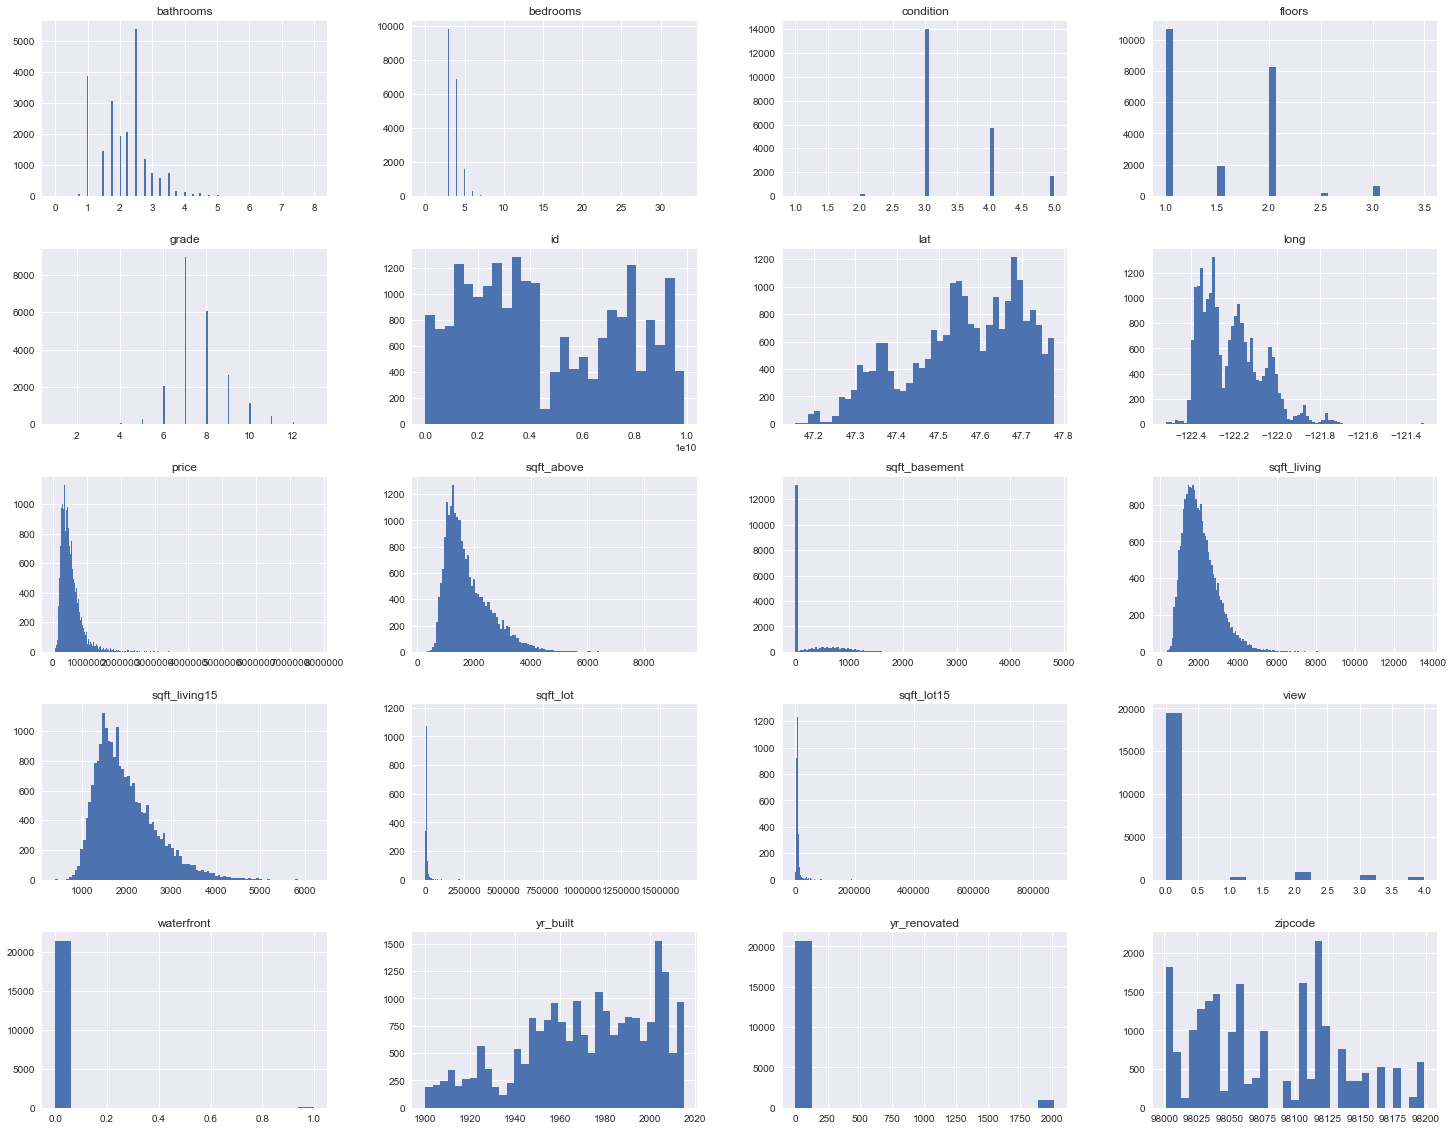

In [25]:
df_house.hist(figsize=(25,20), bins='auto')

In [12]:
regression_data = df_house[neededCols]

In [26]:
regression_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287


In [31]:
X = regression_data.drop(['price'], axis=1)
y = regression_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lm = linear_model.LinearRegression() 

model = lm.fit(X_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                        'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                        'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
                        'sqft_lot15']], y_train)

lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              9177.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):                        0.00
Time:                        11:46:17   Log-Likelihood:                     -2.3746e+05
No. Observations:               17290   AIC:                                  4.750e+05
Df Residuals:                   17276   BIC:                                  4.751e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.968e+04   2326.284    -12.760      0.000   -3.42e+04   -2.51e+04
bathrooms     -7995.0735   3791.798     -2.109      0.035   -1.54e+04    -562.766
sqft_living     122.6055      2.821     43.458      0.000     117.076     128.135
sqft_lot         -0.0039      0.065     -0.060      0.952      -0.131       0.123
floors         4450.1758   4317.126      1.031      0.303   -4011.828    1.29e+04
waterfront     5.517e+05   2.19e+04     25.144      0.000    5.09e+05    5.95e+05
view           5.495e+04   2608.649     21.064      0.000    4.98e+04    6.01e+04
condition      5.825e+04   2686.665     21.680      0.000     5.3e+04    6.35e+04
grade          1.107e+05   2587.049     42.806      0.000    1.06e+05    1.16e+05
sqft_above       46.7345      2.718     17.196      0.000      41.408      52.062
sqft_basement    75.8710      3.201     23.701      0.000      69.596      82.146
yr_built       -409.1591      9.695    -42.203      0.000    -428.162    -390.156
yr_renovated     69.4426      4.307     16.123      0.000      61.000      77.885
sqft_living15    16.9298      4.158      4.072      0.000       8.780      25.079
sqft_lot15       -0.6247      0.092     -6.812      0.000      -0.804      -0.445
==============================================================================
Omnibus:                    13006.793   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           954079.011
Skew:                           3.004   Prob(JB):                         0.00
Kurtosis:                      38.892   Cond. No.                     4.05e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.51e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

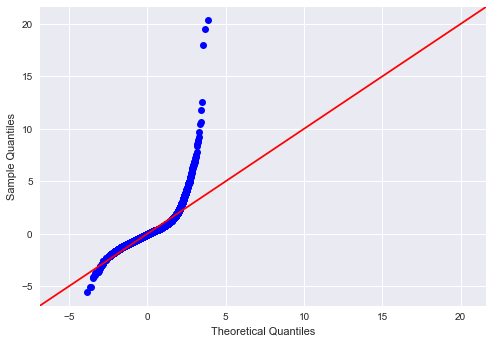

In [28]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [34]:
model.score(X_test, y_test)

AttributeError: 'OLSResults' object has no attribute 'score'

In [35]:
print('model accuracy is : ' , model.score(X_test,y_test))

AttributeError: 'OLSResults' object has no attribute 'score'

In [36]:
print('MSE for train set:', np.sqrt(mean_squared_error(y_train, model_1.predict(X_train))))

NameError: name 'model_1' is not defined

In [80]:
print('MSE for test set:', np.sqrt(mean_squared_error(y_test, model_1.predict(X_test))))

MSE for test set: 236611.33436665515


In [85]:
print('Cross Validation Score:', cross_val_score(model, X_train, y_train, cv = 100, scoring = "r2").mean())

TypeError: estimator should be an estimator implementing 'fit' method, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fd2517a3b70> was passed

In [37]:
print('model accuracy is : ', model.score(X_test,y_test))
print('MSE for train set:', np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
print('MSE for test set:', np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
print('Cross Validation Score:', cross_val_score(model, X_train, y_train, cv = 100, scoring = "r2").mean())

AttributeError: 'OLSResults' object has no attribute 'score'

In [60]:
#clean date
clean_date = df_house.date.apply(lambda x: x.split('T')[0])
clean_date

#clean date column
df_house['date'] = clean_date
df_house.head()

#format date column
df_house['date'] = pd.to_datetime(df_house['date'], format = '%Y/%m/%d')
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [61]:
df_house.date = df_house.date.astype(np.int64)

In [62]:
#remove outliers outside of 2 standard diviations
z_scores = stats. zscore(df_house)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2).all(axis=1)
df_house_2std = df_house[filtered_entries]

In [63]:
df_house_2std

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,1413158400000000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,5631500400,1424822400000000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,1954400510,1424217600000000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,1321400060,1403827200000000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
8,2414600126,1429056000000000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21607,2997800021,1424304000000000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21609,6600060120,1424649600000000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,1403481600000000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,1421366400000000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [64]:
#houses within this price range do not have waterfront views and generally were not renovated
df_house_2std.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.007779,0.026160,-0.005780,0.030379,0.018458,-0.108530,0.032897,NaN,0.007685,...,0.049810,0.019062,-0.001870,0.027347,NaN,-0.017216,0.002674,0.006598,0.023373,-0.097857
date,0.007779,1.000000,0.002255,-0.014255,-0.035609,-0.032344,-0.016181,-0.029060,NaN,0.017513,...,-0.042875,-0.032045,0.000626,-0.028919,NaN,0.006642,-0.034123,-0.021298,-0.032193,-0.022355
price,0.026160,0.002255,1.000000,0.250478,0.376706,0.560352,0.105255,0.274273,NaN,0.112028,...,0.596061,0.481312,0.133343,0.101111,NaN,-0.053083,0.458320,0.156784,0.511693,0.111024
bedrooms,-0.005780,-0.014255,0.250478,1.000000,0.454311,0.592598,0.124304,0.232707,NaN,0.017255,...,0.307184,0.490512,0.177135,0.208880,NaN,-0.194160,-0.072614,0.201341,0.407644,0.128176
bathrooms,0.030379,-0.035609,0.376706,0.454311,1.000000,0.695700,0.030860,0.581673,NaN,0.017994,...,0.595336,0.617041,0.127531,0.662622,NaN,-0.280951,-0.068542,0.349973,0.536886,0.042828
sqft_living,0.018458,-0.032344,0.560352,0.592598,0.695700,1.000000,0.216331,0.464913,NaN,0.055377,...,0.689560,0.866475,0.223263,0.435053,NaN,-0.251615,-0.011667,0.348237,0.744917,0.227168
sqft_lot,-0.108530,-0.016181,0.105255,0.124304,0.030860,0.216331,1.000000,-0.093176,NaN,0.013603,...,0.137586,0.203379,0.017187,-0.030821,NaN,-0.138479,-0.011041,0.241982,0.270114,0.850087
floors,0.032897,-0.029060,0.274273,0.232707,0.581673,0.464913,-0.093176,1.000000,NaN,-0.027270,...,0.496034,0.625778,-0.331511,0.607661,NaN,-0.141258,-0.064346,0.276503,0.376695,-0.085483
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,0.007685,0.017513,0.112028,0.017255,0.017994,0.055377,0.013603,-0.027270,NaN,1.000000,...,0.045836,0.004131,0.097987,-0.048775,NaN,0.048564,0.013709,-0.071918,0.074266,0.007673


In [65]:
df_house_2std.drop(['waterfront', 'yr_renovated'], axis=1, inplace=True)

/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd24eb05668>,
      dtype=object)

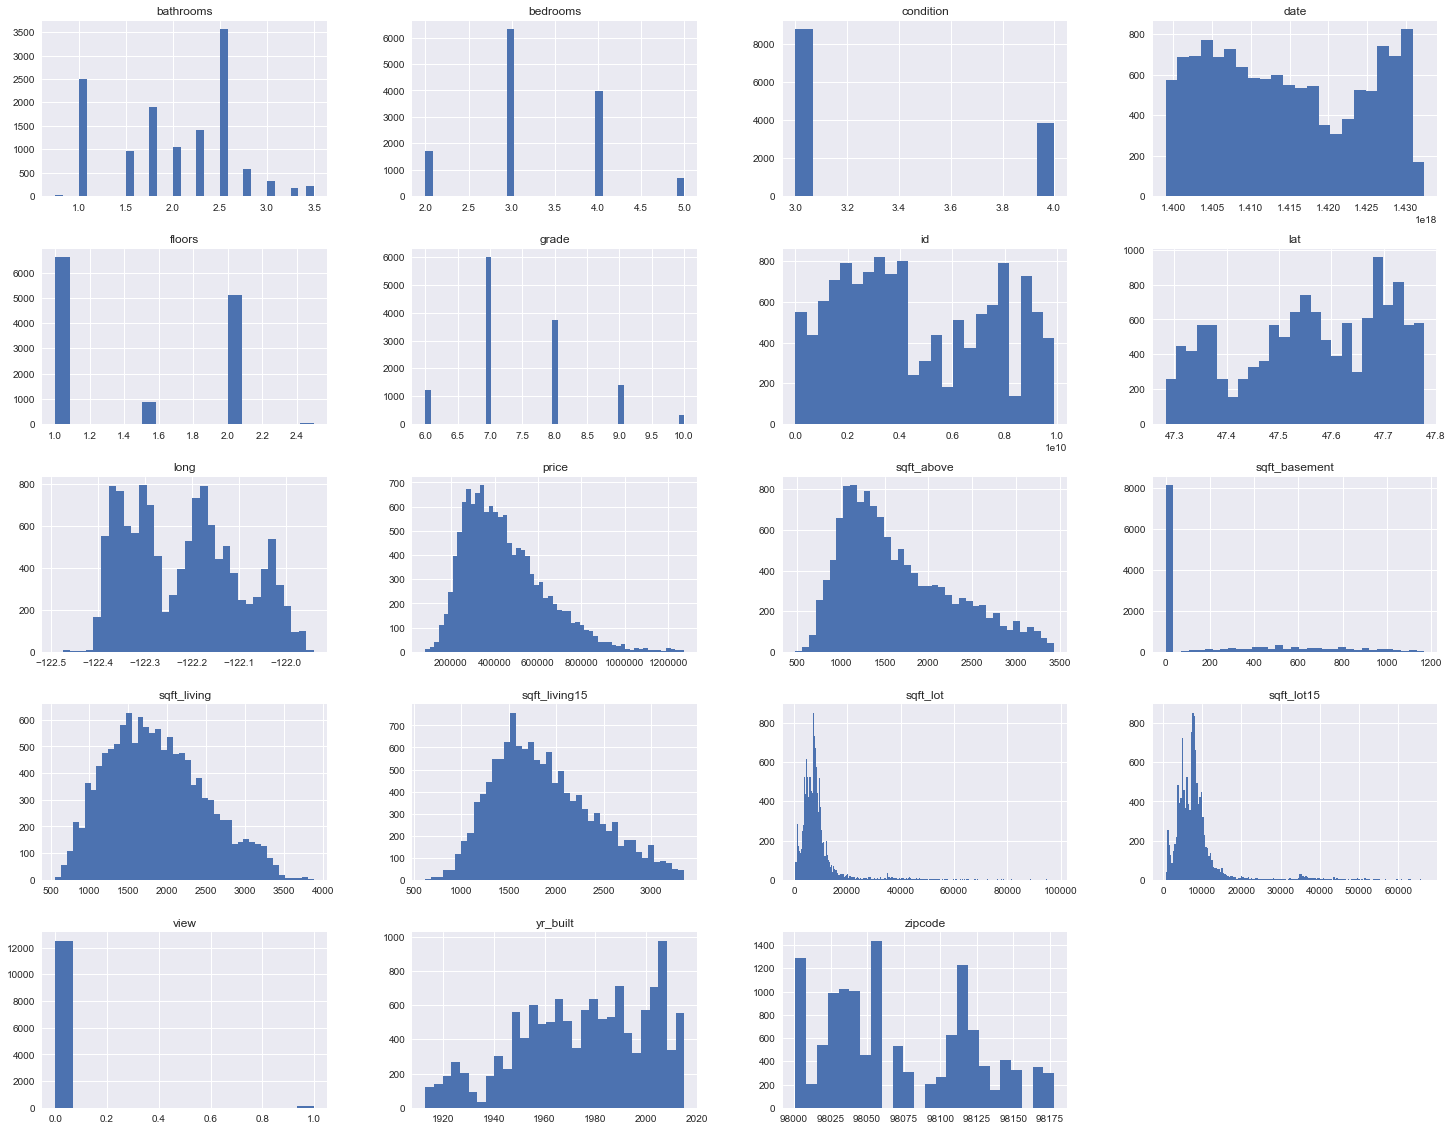

In [66]:
#histograms with Outliers Removed
df_house_2std.hist(figsize=(25,20), bins='auto')

In [67]:
neededCols_2std = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
            'sqft_living15', 'sqft_lot15']

regression_data_2std = df_house_2std[neededCols_2std]

In [68]:
#regression model with outliers removed

X_2 = regression_data_2std.drop(['price'], axis=1)
y_2 = regression_data_2std['price']

X_2train, X_2test, y_2train, y_2test = train_test_split(X_2, y_2, test_size=0.20, random_state=42)

lm = linear_model.LinearRegression() 

model_2std = lm.fit(X_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                        'view', 'condition', 'grade', 'sqft_above',
                        'sqft_basement', 'yr_built', 'sqft_living15',
                        'sqft_lot15']], y_train)

lm = sm.OLS(y_train, X_train)
model_2std = lm.fit()
model_2std.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              9177.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):                        0.00
Time:                        10:16:11   Log-Likelihood:                     -2.3746e+05
No. Observations:               17290   AIC:                                  4.750e+05
Df Residuals:                   17276   BIC:                                  4.751e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.968e+04   2326.284    -12.760      0.000   -3.42e+04   -2.51e+04
bathrooms     -7995.0735   3791.798     -2.109      0.035   -1.54e+04    -562.766
sqft_living     122.6055      2.821     43.458      0.000     117.076     128.135
sqft_lot         -0.0039      0.065     -0.060      0.952      -0.131       0.123
floors         4450.1758   4317.126      1.031      0.303   -4011.828    1.29e+04
waterfront     5.517e+05   2.19e+04     25.144      0.000    5.09e+05    5.95e+05
view           5.495e+04   2608.649     21.064      0.000    4.98e+04    6.01e+04
condition      5.825e+04   2686.665     21.680      0.000     5.3e+04    6.35e+04
grade          1.107e+05   2587.049     42.806      0.000    1.06e+05    1.16e+05
sqft_above       46.7345      2.718     17.196      0.000      41.408      52.062
sqft_basement    75.8710      3.201     23.701      0.000      69.596      82.146
yr_built       -409.1591      9.695    -42.203      0.000    -428.162    -390.156
yr_renovated     69.4426      4.307     16.123      0.000      61.000      77.885
sqft_living15    16.9298      4.158      4.072      0.000       8.780      25.079
sqft_lot15       -0.6247      0.092     -6.812      0.000      -0.804      -0.445
==============================================================================
Omnibus:                    13006.793   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           954079.011
Skew:                           3.004   Prob(JB):                         0.00
Kurtosis:                      38.892   Cond. No.                     4.05e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.51e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

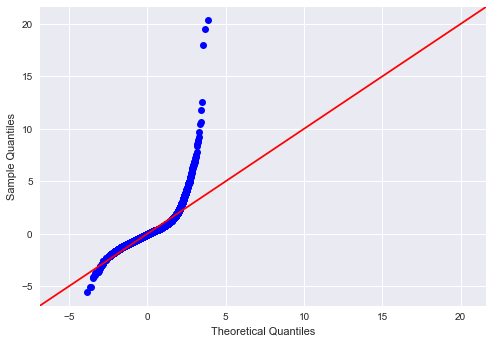

In [69]:
fig = sm.graphics.qqplot(model_2std.resid, dist=stats.norm, line='45', fit=True)

In [70]:
print('model accuracy is : ',model.score(X_test,y_test))
print('MSE for train set:', np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
print('MSE for test set:', np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
print('Cross Validation Score:', cross_val_score(model, X_train, y_train, cv = 100, scoring = "r2").mean())

NameError: name 'model' is not defined

In [18]:
df_house_1.corr()

NameError: name 'df_house_1' is not defined

In [ ]:
sns.heatmap(df_house_2std.corr(), annot=True,);